# Figure 5

In [1]:
source(here::here("code/init.R"))

ℹ Parallelization enabled. Using 102 threads.



## Figure 5A

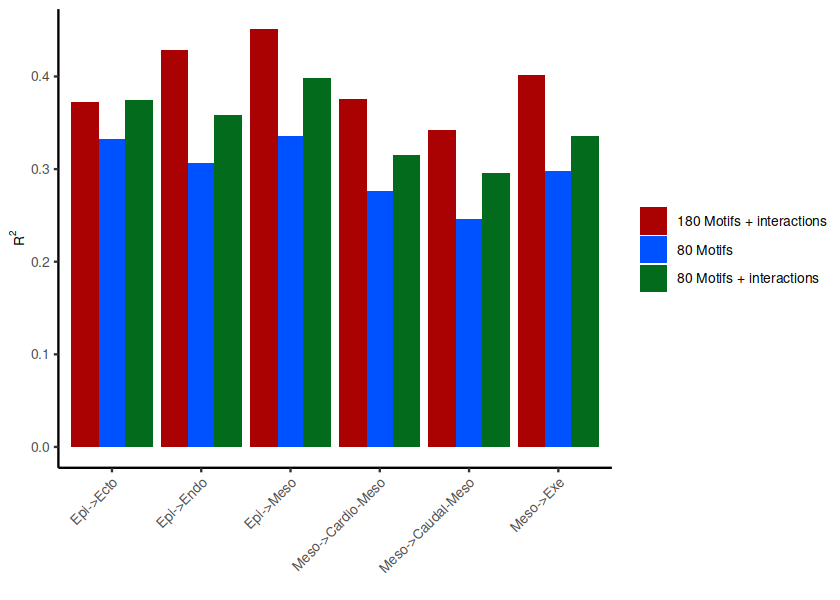

In [2]:
r2_df <- fread(here("data/stats/homogenization_with_interactions_stats.csv"))
sps(7, 5)
p <- r2_df %>%
    ggplot(aes(x = traj, y = r2_test, fill = type, label = n)) +
    geom_col(position = "dodge") +
    labs(x = "", y = expression(R^2)) +    
    scale_fill_manual(name = "", values = c("80 Motifs" = "#0051ff", "80 Motifs + interactions" = "#026b1c", "180 Motifs + interactions" = "#aa0202")) +
    theme(axis.text.x = ggplot2::element_text(angle = 45, hjust = 1))
p

## Figure 5B

In [3]:
traj_preds_gastru <- readr::read_rds(here("data/stats/gastrulation_predictions.rds"))
traj <- "meso"
traj_preds <- traj_preds_gastru %>% filter(cell_type == traj)
head(traj_preds)

,peak_name,type,borzoi,chrombpnet,deeptopic_cnn,enformer,simple_convnet,IQ,obs,all_deep_models,⋯,simple_convnet+borzoi,simple_convnet+deeptopic_cnn,simple_convnet+enformer,simple_convnet+IQ,simple_convnet+IQ (ensemble),xgboost,xgboost_all_deep_models,tss_dist,tss,cell_type
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>
1,1_Xkr4_3004,train,0.4872340,-0.002130657,0.4443102,-0.012147605,0.3392516,-0.0664257732,0.016869936,-0.0005830566,⋯,-0.05816729,-0.01103412,-0.070933983,-0.06928289,-0.12929348,-0.018576739,-0.022851992,211711,FALSE,meso
2,1_Xkr4_3009,train,0.5039166,0.002645380,0.4550865,0.001385093,0.3702884,0.0008623657,0.034694302,0.0343130231,⋯,0.01073052,0.02821482,-0.008400052,0.01638539,-0.04869739,0.007041107,0.006695471,206451,FALSE,meso
3,1_Xkr4_3036,train,0.4801639,0.050735271,0.4217100,-0.126074280,0.3522560,-0.1219048041,-0.098864696,-0.0322906551,⋯,-0.04158167,-0.05063753,-0.114940587,-0.06621689,-0.16831002,-0.078008473,-0.097896598,179551,FALSE,meso
4,1_Xkr4_3063,train,0.2339831,-0.213702585,0.3113656,-0.224241050,0.2466224,-0.2801985451,-0.203796667,-0.4164648285,⋯,-0.44152995,-0.33649437,-0.358364147,-0.33004114,-0.34822385,-0.274350673,-0.287454486,152451,FALSE,meso
5,1_Xkr4_3192,train,0.4992496,0.095953902,0.4978421,0.059094235,0.4087616,0.0675851407,0.172574737,0.1452179459,⋯,0.07399426,0.13763304,0.093147002,0.11603254,0.04485898,0.198305339,0.196857780,23571,FALSE,meso
6,1_Xkr4_3264,train,0.4424235,-0.001123316,0.4298195,0.002201632,0.3647566,-0.0890519569,-0.007575463,-0.0450591106,⋯,-0.05267018,-0.02703836,-0.017650406,-0.02945584,-0.07946031,-0.021234494,-0.023429910,-48368,FALSE,meso


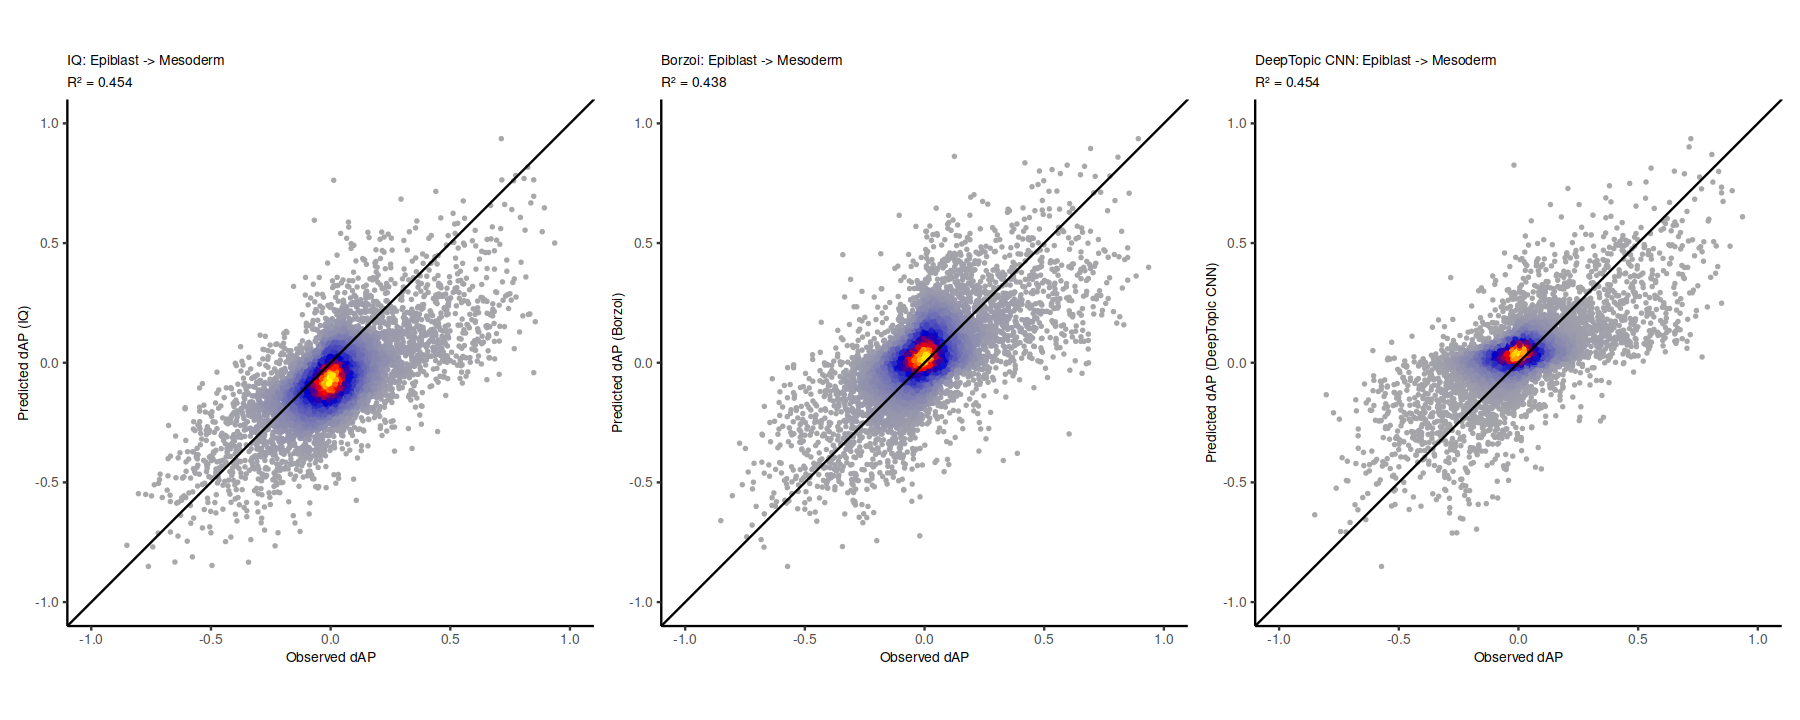

In [4]:
sps(15, 6)
p_iq <- plot_obs_model_scatter(traj_preds, x_axis = "obs", x_axis_alias = "Observed dAP", y_axis = "IQ", y_axis_alias = "Predicted dAP (IQ)", point_size = 0.5, plot_r2 = TRUE) + labs(title = "IQ: Epiblast -> Mesoderm")
p_borzoi <- plot_obs_model_scatter(traj_preds, x_axis = "obs", x_axis_alias = "Observed dAP", y_axis = "borzoi", y_axis_alias = "Predicted dAP (Borzoi)", point_size = 0.5, plot_r2 = TRUE) + labs(title = "Borzoi: Epiblast -> Mesoderm")
p_deeptopic <- plot_obs_model_scatter(traj_preds, x_axis = "obs", x_axis_alias = "Observed dAP", y_axis = "deeptopic_cnn", y_axis_alias = "Predicted dAP (DeepTopic CNN)", point_size = 0.5, plot_r2 = TRUE) + labs(title = "DeepTopic CNN: Epiblast -> Mesoderm")

p_iq + p_borzoi + p_deeptopic

## Figure 5C

In [5]:
r2_stats <- fread(here("data/stats/other_tools_comparison_stats.csv"))

In [6]:
model_names_map <- c(
    "IQ" = "IQ",
    "chrombpnet" = "Dilated CNN",
    "borzoi" = "Borzoi",
    "deeptopic_cnn" = "DeepTopic CNN",
    "simple_convnet" = "Simple Convnet",
    "enformer" = "Enformer"
)
model_colors_map <- c(
    "#749B58FF", "#5050FFFF", "#CE3D32FF", "#F0E685FF", "#466983FF",
    "#BA6338FF"
)
names(model_colors_map) <- names(model_names_map)

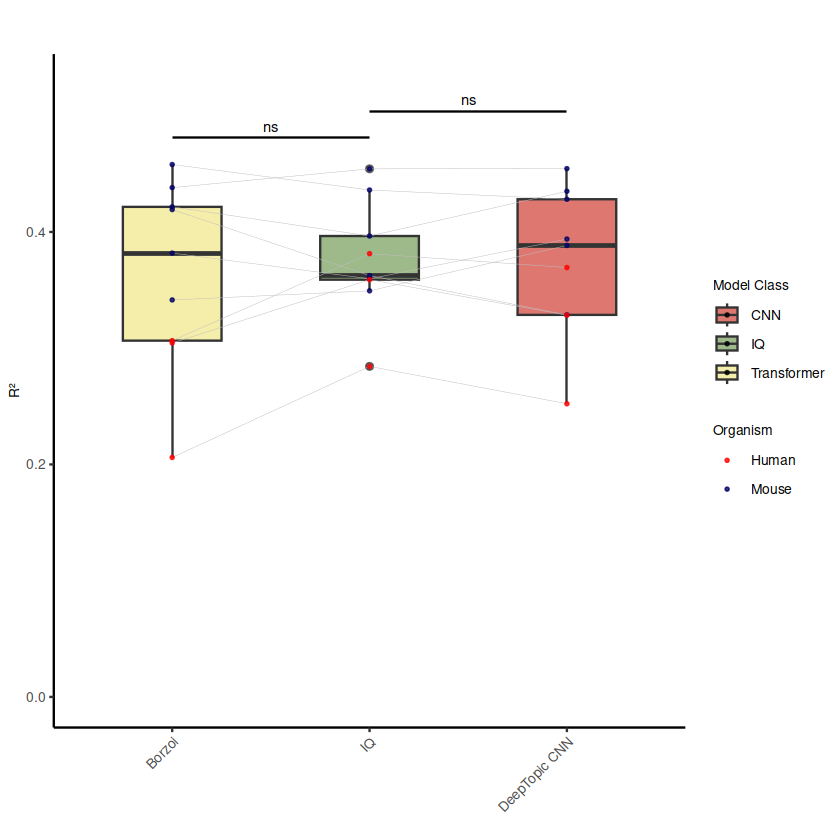

In [7]:
sps(7, 7)
p <- compare_models_multiple(r2_stats, c("borzoi", "IQ", "deeptopic_cnn"), model_names_map = model_names_map, title = "", subtitle = "", hide_ns_bars = FALSE, show_cell_types = FALSE, point_size = 0.5, line_width = 0.1, line_alpha = 1, line_color = "gray")
p

In [8]:
compare_models_multiple(r2_stats, c("borzoi", "IQ", "deeptopic_cnn"),
    model_names_map = model_names_map, show_cell_types = FALSE, show_connected_lines = TRUE, title = "", subtitle = "", line_color =
        "gray", test_all_pairs = TRUE, hide_ns_bars = FALSE, return_pairwise_results = TRUE
) %>%
    arrange(pval) %>%
    as.data.frame() %>%
    arrange(model_a)

model_a,model_b,signif,pval
<chr>,<chr>,<lgl>,<dbl>
IQ,deeptopic_cnn,FALSE,0.8127037
borzoi,IQ,FALSE,0.8127037
borzoi,deeptopic_cnn,FALSE,0.8127037


## Figure 5D

In [9]:
r2_stats_full <- readr::read_rds(here("data/stats/other_tools_comparison_stats.rds"))

In [10]:
r2_stats_full

model,cell_type,r2,organism,model_class
<fct>,<chr>,<dbl>,<chr>,<fct>
Borzoi + IQ,meso,0.5225518,Mouse,IQ Ensemble
DeepTopic CNN + IQ,meso,0.5082455,Mouse,IQ Ensemble
All Deep Models,meso,0.5322704,Mouse,Ensemble
DeepTopic CNN + Borzoi,meso,0.5068604,Mouse,Ensemble
Borzoi + IQ,cardio,0.4614491,Mouse,IQ Ensemble
DeepTopic CNN + IQ,cardio,0.4334777,Mouse,IQ Ensemble
All Deep Models,cardio,0.4615172,Mouse,Ensemble
DeepTopic CNN + Borzoi,cardio,0.4449325,Mouse,Ensemble
Borzoi + IQ,endo,0.5222283,Mouse,IQ Ensemble


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


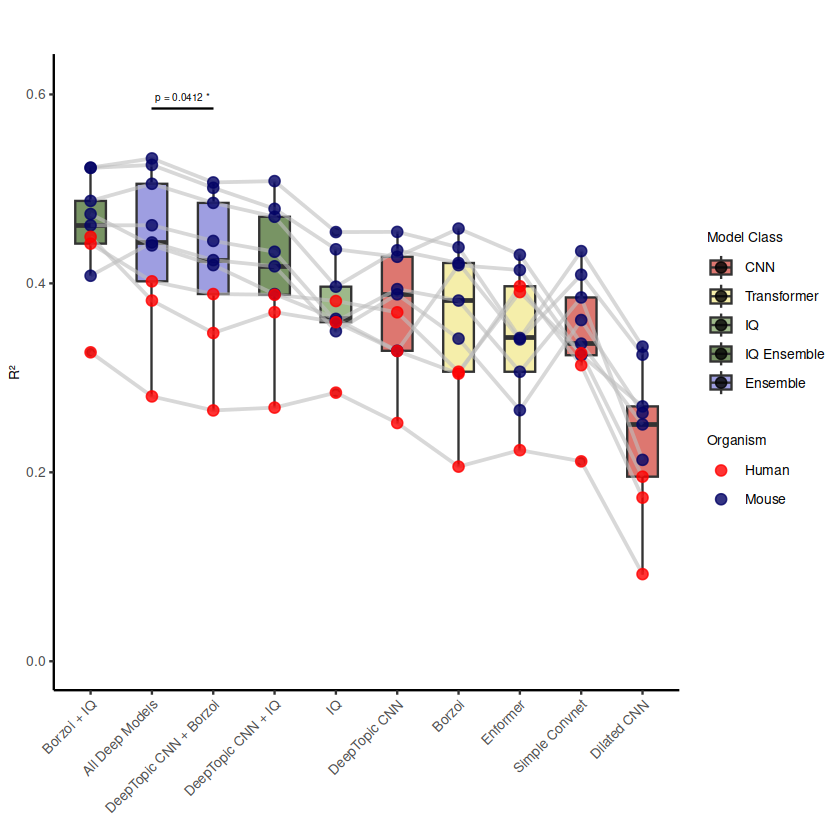

In [11]:
sps(7, 7)
compare_models_multiple(r2_stats_full, levels(r2_stats_full$model), show_cell_types = FALSE, show_connected_lines = TRUE, title = "", subtitle = "", line_color = "gray", )

## Figure 5E

In [12]:
gastru_models <- readr::read_rds(here("data/models/gastrulation_models_homogenized.rds"))
traj_model <- gastru_models$meso

In [13]:
gastru_data <- readr::read_rds(here("data/gastrulation_peaks.rds"))

In [14]:
# Set trajectory and filter predictions
traj <- "meso"
traj_preds <- traj_preds_gastru %>% filter(cell_type == traj)

In [15]:
# Create residual dataframe
resid_df <- traj_preds %>%
    filter(!tss) %>%
    mutate(ensemble = `borzoi+IQ (ensemble)`) %>%
    mutate(
        borzoi = norm01(borzoi),
        IQ = norm01(IQ),
        deeptopic_cnn = norm01(deeptopic_cnn),
        ensemble = norm01(ensemble)
    ) %>%
    mutate(
        borzoi = rescale(borzoi, obs),
        IQ = rescale(IQ, obs),
        deeptopic_cnn = rescale(deeptopic_cnn, obs),
        ensemble = rescale(ensemble, obs)
    ) %>%
    mutate(ensemble_resid = abs(ensemble - obs)) %>%
    mutate(borzoi_resid = abs(borzoi - obs), iq_resid = abs(IQ - obs), deeptopic_resid = abs(deeptopic_cnn - obs)) %>%
    mutate(borzoi_improv = iq_resid - borzoi_resid, deeptopic_improv = iq_resid - deeptopic_resid, ensemble_improv = iq_resid - ensemble_resid) %>%
    arrange(desc(ensemble_improv)) %>%
    select(peak_name, obs, borzoi, IQ, deeptopic_cnn, ensemble, ends_with("resid"), ends_with("improv")) %>%
    as_tibble() %>%
    left_join(gastru_data %>% select(peak_name, chrom, start, end, tss_dist, tss_gene)) %>%
    left_join(gastru_data %>% select(peak_name, bin1 = nas_bin1, bin4 = nas_bin4)) %>%
    select(chrom, start, end, peak_name, tss_dist, tss_gene, everything())

Joining with `by = join_by(peak_name)`
Joining with `by = join_by(peak_name)`


In [16]:
# Classify residual types
resid_correct <- 0.05
resid_incorrect <- 0.1
min_diff <- 0.2

df1 <- resid_df %>%
    mutate(
        resid_type = case_when(
            abs(obs) >= min_diff & abs(ensemble_resid) <= resid_correct & abs(iq_resid) <= resid_correct & abs(borzoi_resid) <= resid_correct ~ "all_correct",
            abs(obs) >= min_diff & abs(ensemble_resid) <= resid_correct & abs(iq_resid) <= resid_correct & abs(borzoi_resid) > resid_incorrect ~ "borzoi_error",
            abs(obs) >= min_diff & abs(ensemble_resid) <= resid_correct & abs(iq_resid) > resid_incorrect & abs(borzoi_resid) <= resid_correct ~ "iq_error",
            abs(obs) >= min_diff & abs(ensemble_resid) <= resid_correct & abs(iq_resid) > resid_incorrect & abs(borzoi_resid) > resid_incorrect ~ "both_error",
            TRUE ~ "other"
        )
    ) %>%
    mutate(resid_type = factor(resid_type, levels = c("all_correct", "iq_error", "borzoi_error", "both_error", "other"))) %>%
    arrange(desc(resid_type)) %>%
    left_join(traj_preds %>% select(peak_name, type))

Joining with `by = join_by(peak_name)`


In [17]:
# Create outlier dataframe for all data
outlier_df_all <- traj_model@normalized_energies %>%
    as.data.frame() %>%
    mutate(peak_name = traj_model@peak_intervals$peak_name) %>%
    right_join(df1 %>% filter(resid_type != "other")) %>%
    left_join(traj_model@additional_features %>% mutate(peak_name = traj_model@peak_intervals$peak_name))

Joining with `by = join_by(peak_name)`
Joining with `by = join_by(peak_name)`


In [18]:
# Create outlier dataframe for all data
outlier_df_all <- traj_model@normalized_energies %>%
    as.data.frame() %>%
    mutate(peak_name = traj_model@peak_intervals$peak_name) %>%
    right_join(df1 %>% filter(resid_type != "other")) %>%
    left_join(traj_model@additional_features %>% mutate(peak_name = traj_model@peak_intervals$peak_name))

# Perform KS tests
outlier_ks_all <- outlier_df_all %>%
    select(any_of(c(as.vector(colnames(traj_model@normalized_energies)))), resid_type) %>%
    pivot_longer(cols = any_of(c(as.vector(colnames(traj_model@normalized_energies)))), names_to = "feature", values_to = "value") %>%
    group_by(feature) %>%
    group_modify(~ {
        ks_test <- ks.test(.$value[.$resid_type == "all_correct"], .$value[.$resid_type == "both_error"])
        ks_test_iq <- ks.test(.$value[.$resid_type == "all_correct"], .$value[.$resid_type == "iq_error"])
        ks_test_borzoi <- ks.test(.$value[.$resid_type == "all_correct"], .$value[.$resid_type == "borzoi_error"])
        data.frame(ks_test_D = ks_test$statistic, ks_test = ks_test$p.value, ks_test_iq_D = ks_test_iq$statistic, ks_test_iq = ks_test_iq$p.value, ks_test_borzoi_D = ks_test_borzoi$statistic, ks_test_borzoi = ks_test_borzoi$p.value)
    }) %>%
    ungroup() %>%
    arrange(ks_test) %>%
    mutate(ks_qval = p.adjust(ks_test, method = "fdr"), ks_qval_iq = p.adjust(ks_test_iq, method = "fdr"), ks_qval_borzoi = p.adjust(ks_test_borzoi, method = "fdr"))

Joining with `by = join_by(peak_name)`


Joining with `by = join_by(peak_name)`
Warning message in ks.test.default(.$value[.$resid_type == "all_correct"], .$value[.$resid_type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(.$value[.$resid_type == "all_correct"], .$value[.$resid_type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(.$value[.$resid_type == "all_correct"], .$value[.$resid_type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(.$value[.$resid_type == "all_correct"], .$value[.$resid_type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(.$value[.$resid_type == "all_correct"], .$value[.$resid_type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(.$value[.$resid_type == "all_correct"], .$value[.$resid_type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.defa

feature,model,qval
<chr>,<chr>,<dbl>
Eomes/Tbox,Borzoi error,3.544515e-10
Hoxb2_Tbx,Borzoi error,4.440010e-05
Dmrta2,Borzoi error,8.135647e-04
Tcf,Borzoi error,9.830663e-05
CAAA,IQ error,1.509777e-02
Nanog/Sox,Borzoi error,2.038489e-04
Meis,Borzoi error,3.613550e-03
Snai,Borzoi error,8.135647e-04
Mesp2,Borzoi error,1.444398e-02


Joining with `by = join_by(feature, model)`


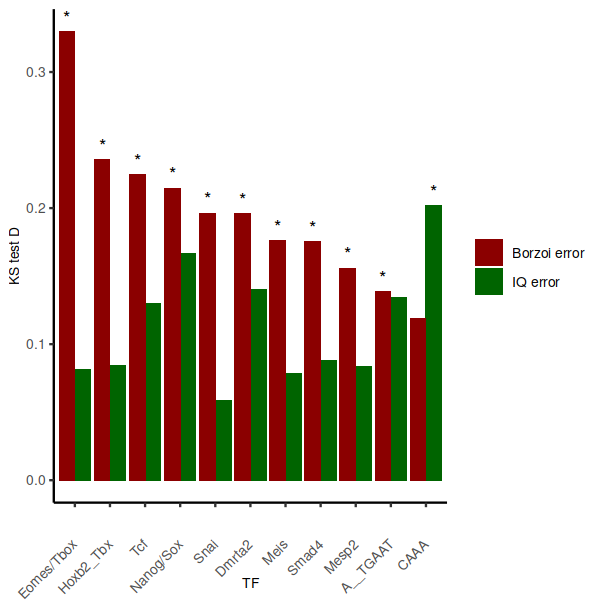

In [19]:
sps(5, 5)

signif_df <- outlier_ks_all %>%
    select(feature, ks_test_iq_D, ks_test_borzoi_D, ks_qval_iq, ks_qval_borzoi) %>%
    filter(ks_qval_iq < 0.05 | ks_qval_borzoi < 0.05) %>%
    select(feature, `IQ error` = ks_qval_iq, `Borzoi error` = ks_qval_borzoi) %>%
    pivot_longer(cols = c(`IQ error`, `Borzoi error`), names_to = "model", values_to = "qval")

signif_df %>% filter(qval < 0.05)

feature_levels <- outlier_ks_all %>%
    arrange(ks_test_borzoi_D) %>%
    pull(feature) %>%
    rev() %>%
    unique()

p <- outlier_ks_all %>%
    select(feature, ks_test_iq_D, ks_test_borzoi_D, ks_qval_iq, ks_qval_borzoi) %>%
    filter(ks_qval_iq < 0.05 | ks_qval_borzoi < 0.05) %>%
    select(feature, `IQ error` = ks_test_iq_D, `Borzoi error` = ks_test_borzoi_D) %>%
    pivot_longer(cols = c(`IQ error`, `Borzoi error`), names_to = "model", values_to = "ks_test_D") %>%
    left_join(signif_df %>% filter(qval < 0.05)) %>%
    mutate(label = case_when(
        qval < 0.05 ~ "*",
        qval < 0.01 ~ "**",
        qval < 0.001 ~ "***",
        TRUE ~ ""
    )) %>%
    mutate(feature = factor(feature, levels = feature_levels)) %>%
    ggplot(aes(x = feature, y = ks_test_D, fill = model)) +
    geom_col(position = "dodge") +
    scale_fill_manual(values = c(`IQ error` = "darkgreen", `Borzoi error` = "darkred"), name = "") +
    geom_text(aes(label = label), position = position_dodge(width = 0.9), vjust = -0.5) +
    xlab("TF") +
    ylab("KS test D") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 0.5))

p
